github url: https://github.com/Qornck/DataMining_1

or u can click here: [互评作业1](https://github.com/Qornck/DataMining_1)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [91]:
print('数据集：Tweets')
data = pd.read_csv('full_dataset-release.csv', index_col=0)
print('属性类别数:', len(data.columns))
print('总行数:', len(data))
print('示例数据:')
data.head(5)

数据集：Tweets
属性类别数: 13
总行数: 1395450
示例数据:


,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.0,NaN
1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1.0,0.0
2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1.0,0.0
3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1.0,0.0


In [93]:
print('提取每一列属性以及名称')
num_labels = data.select_dtypes(include=np.number).columns.values
nom_labels = data.select_dtypes(exclude=np.number).columns.values
print('标称属性:', nom_labels)
print('数值属性:', num_labels)
print(data.shape," ",nom_labels.shape," ",num_labels.shape)

提取每一列属性以及名称
标称属性: ['TWEET' 'STOCK' 'DATE']
数值属性: ['LAST_PRICE' '1_DAY_RETURN' '2_DAY_RETURN' '3_DAY_RETURN' '7_DAY_RETURN'
 'PX_VOLUME' 'VOLATILITY_10D' 'VOLATILITY_30D' 'LSTM_POLARITY'
 'TEXTBLOB_POLARITY']
(1395450, 13)   (3,)   (10,)


In [94]:
print('频数统计')
print('\n标称属性频数统计')

for label in nom_labels:
    print("label:", data[label].value_counts())

频数统计

标称属性频数统计
label: TWEET
Facebook                                                                                                                                          44257
Ford                                                                                                                                              38389
Next week: Saturday 1st Sep                                                                                                                       29111
Nike                                                                                                                                              28874
Apple                                                                                                                                             23033
                                                                                                                                                  ...  
RT @denverpolitics: Exxon settles pollution case with U.S., 

In [95]:
print('展示每一属性的5数统计')
data.describe()

展示每一属性的5数统计


,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
count,862231.000000,862231.000000,862231.000000,8.622310e+05,8.622310e+05,8.622310e+05,862130.000000,862184.000000,661102.000000,367665.000000
mean,716.123477,0.001473,0.002579,3.262616e+06,6.201036e+06,7.522187e+06,18.293836,10.738204,0.099378,0.076176
std,4731.498118,0.023068,0.032594,1.053913e+07,1.388221e+07,1.591847e+07,16.277630,14.693986,0.760510,0.261048
min,-0.173554,-0.177851,-0.204959,-2.049587e-01,-2.049587e-01,1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,-0.007511,-0.011456,-8.465608e-03,5.474453e-03,2.051700e+01,8.792000,0.000000,-0.600000,0.000000
50%,0.014220,0.000000,0.000000,1.019542e-02,1.575000e+01,3.979400e+01,17.897000,1.000000,0.000000,0.000000
75%,115.600000,0.008192,0.013911,6.545426e-02,4.766038e+06,6.531761e+06,23.916000,20.810000,1.000000,0.150000
max,165500.000000,0.243639,0.267113,3.081068e+08,1.562074e+08,3.148332e+08,124.137000,87.685000,1.000000,1.000000


In [97]:
print('对上面的数值属性进行缺失值统计：\n')
for label in num_labels:
    print(label,":",data[label].isnull().sum())

对上面的数值属性进行缺失值统计：

LAST_PRICE : 533219
1_DAY_RETURN : 533219
2_DAY_RETURN : 533219
3_DAY_RETURN : 533219
7_DAY_RETURN : 533219
PX_VOLUME : 533219
VOLATILITY_10D : 533320
VOLATILITY_30D : 533266
LSTM_POLARITY : 734348
TEXTBLOB_POLARITY : 1027785


数据可视化：

因为全部显示数据过密，因此只显示top10的数据


<Axes: ylabel='LAST_PRICE'>

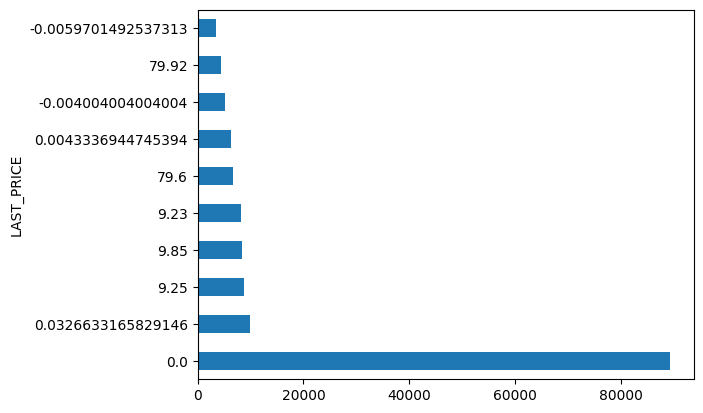

In [98]:
print('数据可视化：\n')
print('因为全部显示数据过密，因此只显示top10的数据')
data[num_labels[0]].value_counts().head(10).plot.barh()

LAST_PRICE 直方图和Q-Q图:


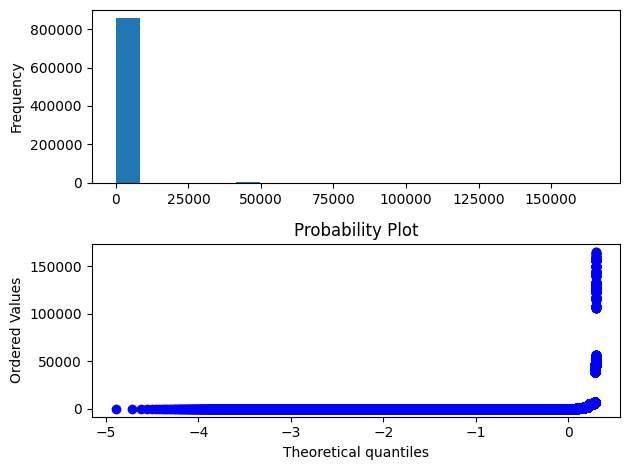

1_DAY_RETURN 直方图和Q-Q图:


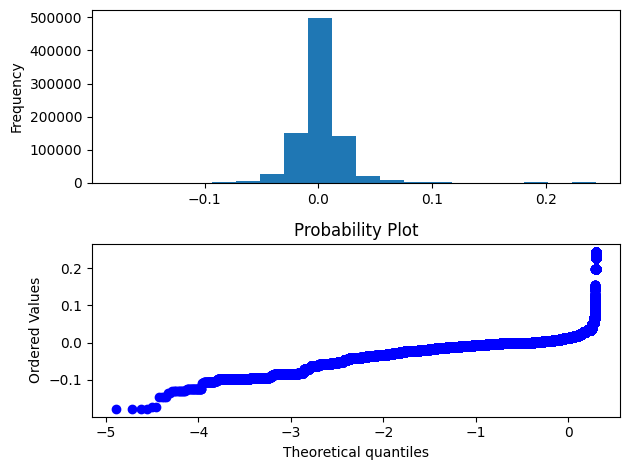

2_DAY_RETURN 直方图和Q-Q图:


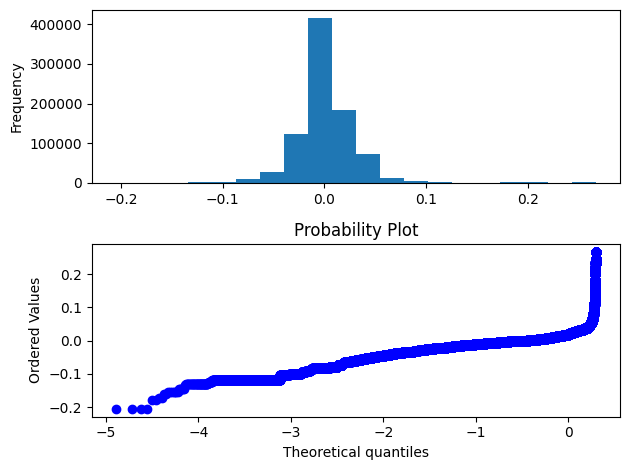

3_DAY_RETURN 直方图和Q-Q图:


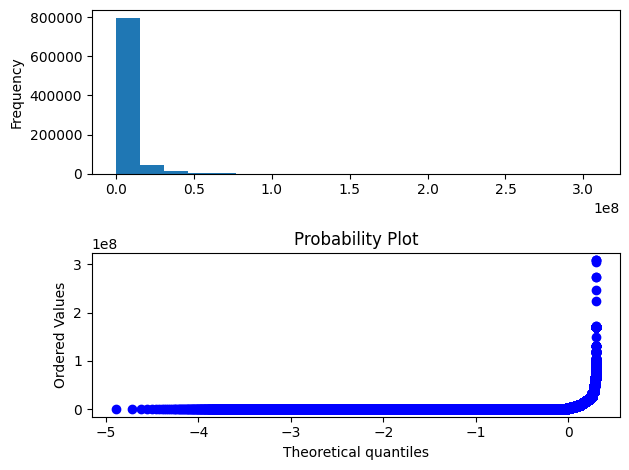

7_DAY_RETURN 直方图和Q-Q图:


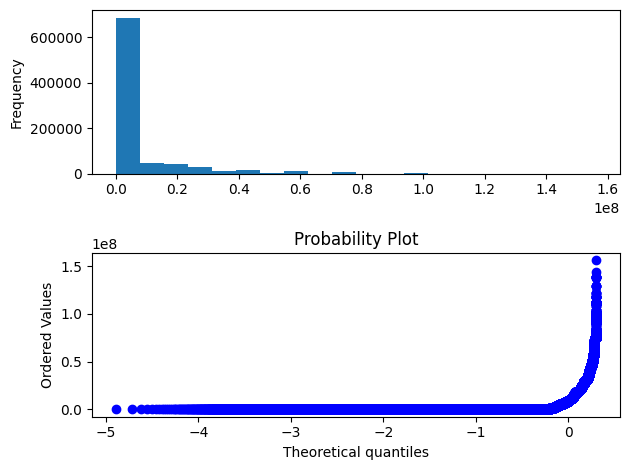

PX_VOLUME 直方图和Q-Q图:


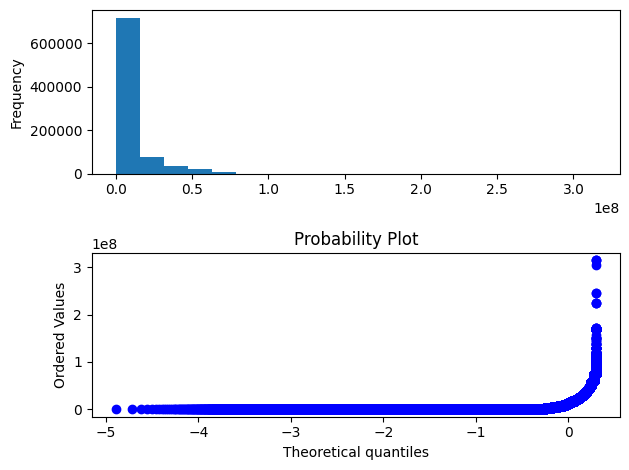

VOLATILITY_10D 直方图和Q-Q图:


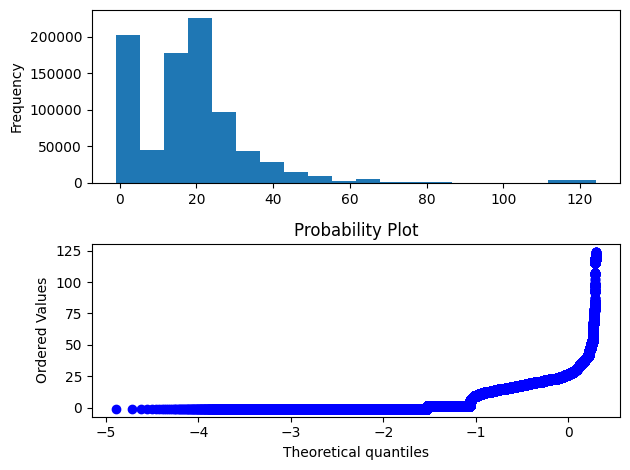

VOLATILITY_30D 直方图和Q-Q图:


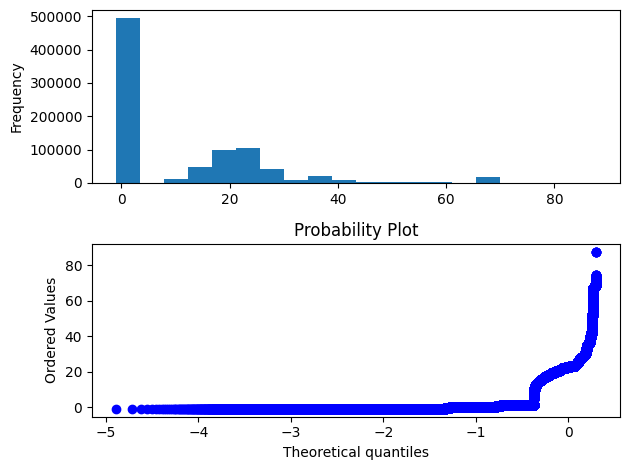

LSTM_POLARITY 直方图和Q-Q图:


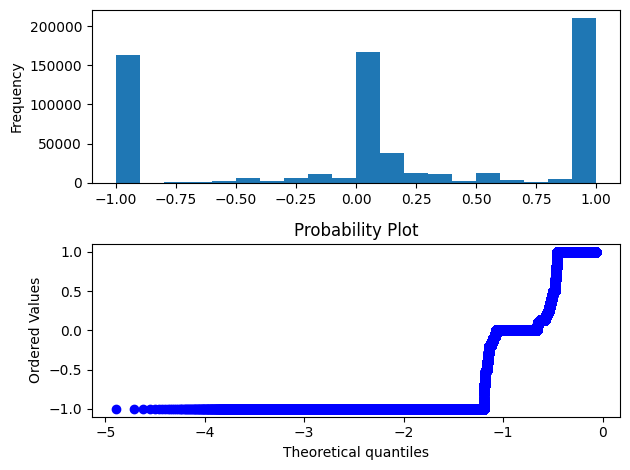

TEXTBLOB_POLARITY 直方图和Q-Q图:


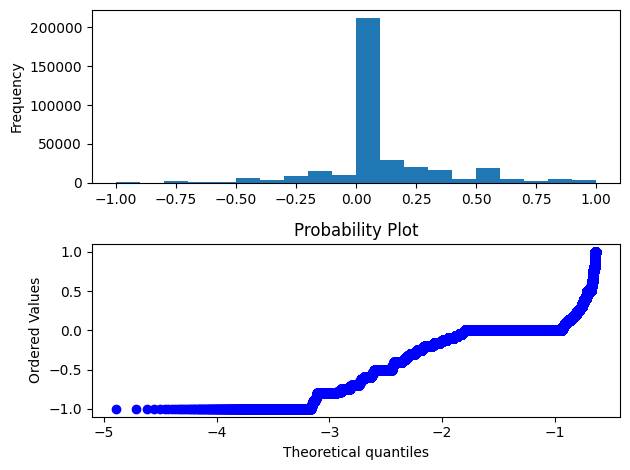

In [99]:
for label in num_labels:
    print(label, '直方图和Q-Q图:')
    plt.subplot(2, 1, 1)
    data[label].plot.hist(bins=20)
    plt.subplot(2, 1, 2)
    stats.probplot(data[label], plot=plt)
    # 调整子图间距
    plt.tight_layout()
    plt.show()

盒图



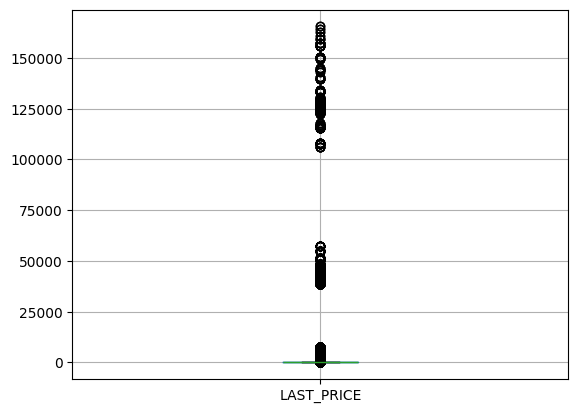

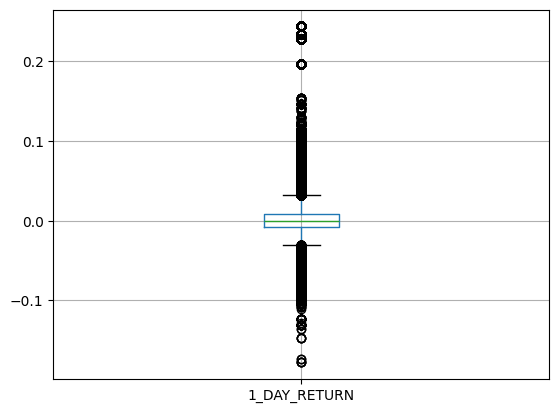

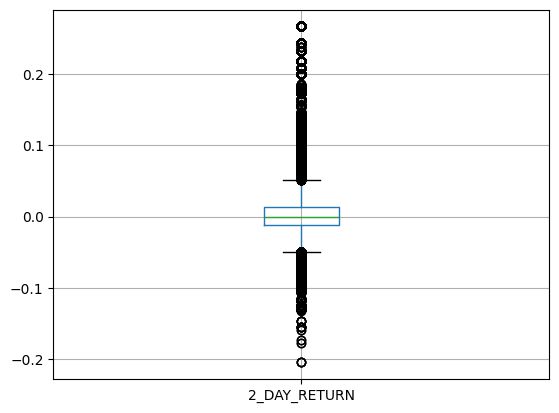

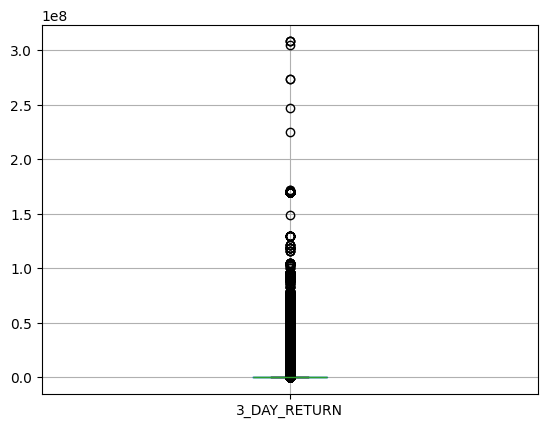

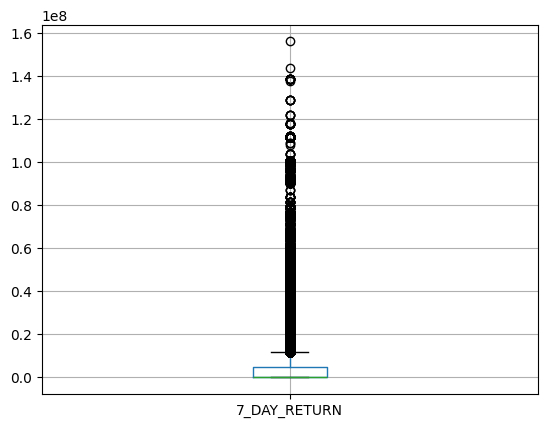

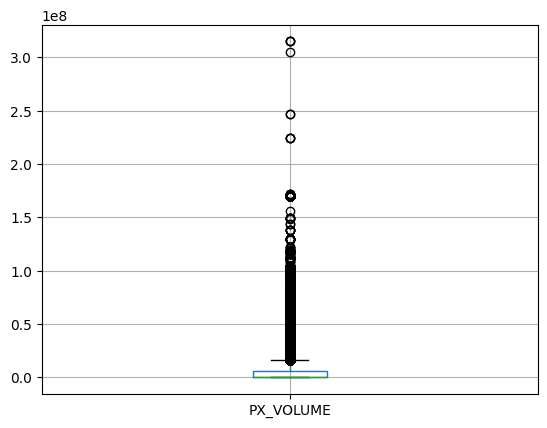

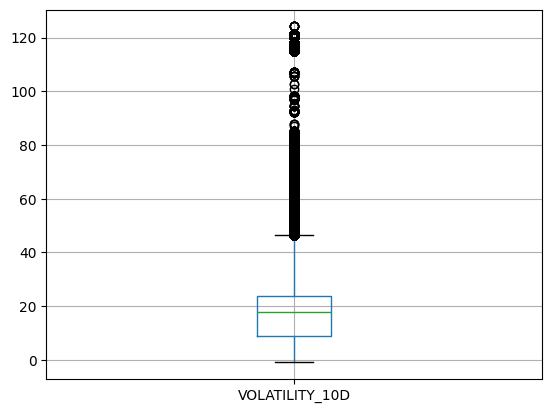

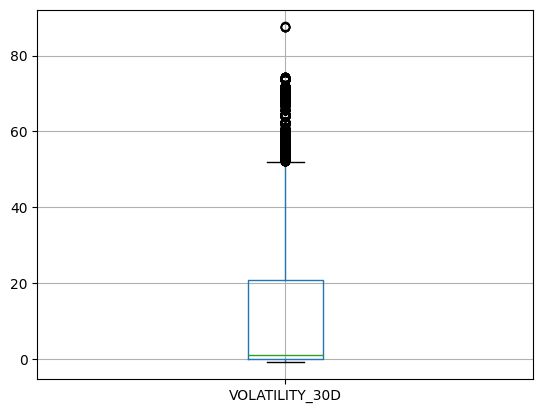

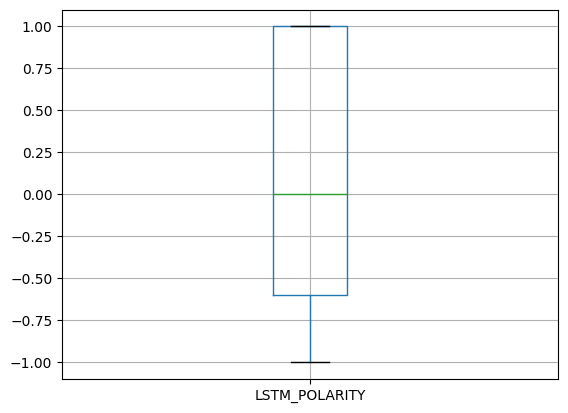

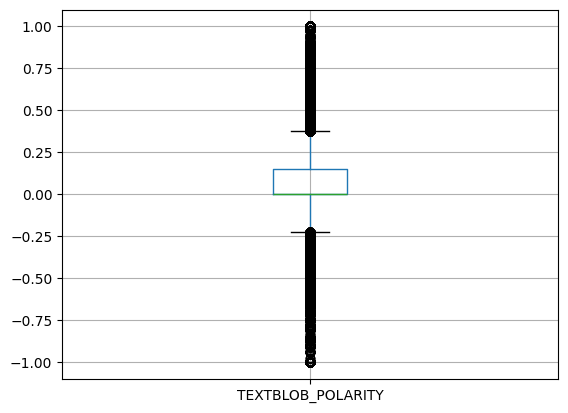

In [100]:
print('盒图\n')
for label in num_labels:
    data.boxplot(label)
    plt.show()

In [101]:
print('对缺失数据进行替补：')
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data != 0]
missing_data

对缺失数据进行替补：


TWEET                     52
STOCK                 533219
DATE                  533219
LAST_PRICE            533219
1_DAY_RETURN          533219
2_DAY_RETURN          533219
3_DAY_RETURN          533219
7_DAY_RETURN          533219
PX_VOLUME             533219
VOLATILITY_10D        533320
VOLATILITY_30D        533266
LSTM_POLARITY         734348
TEXTBLOB_POLARITY    1027785
dtype: int64

In [102]:
print('使用直接剔除方法：')
print('原始数据行数:', len(data))
drop_data = data.dropna(how='any')
print('将缺失部分剔除后数据行数:', len(drop_data))

使用直接剔除方法：
原始数据行数: 1395450
将缺失部分剔除后数据行数: 367620


通过盒图对比新旧数据:


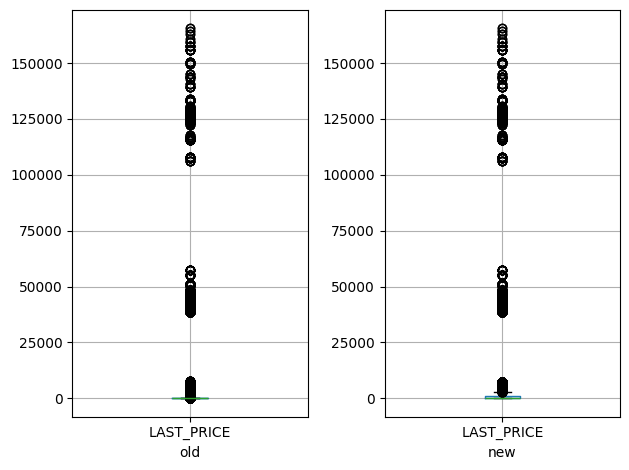

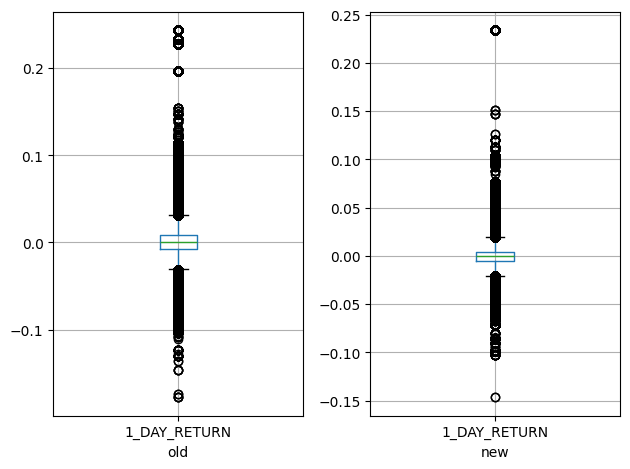

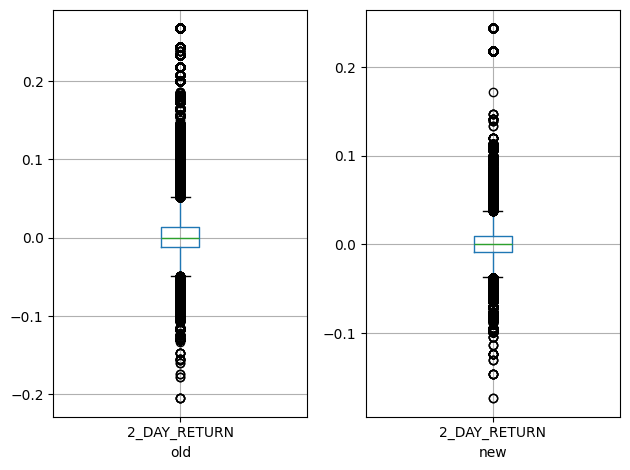

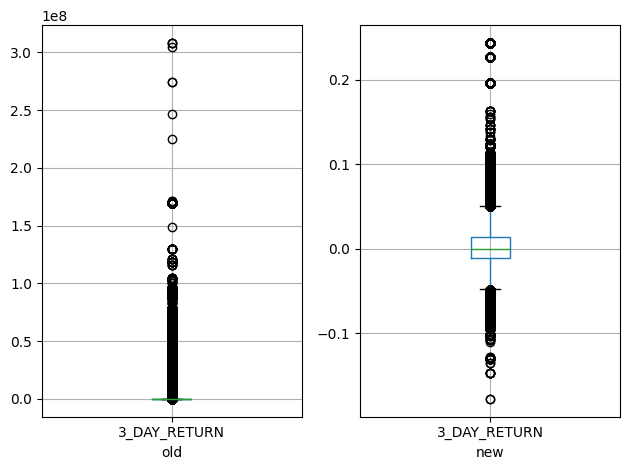

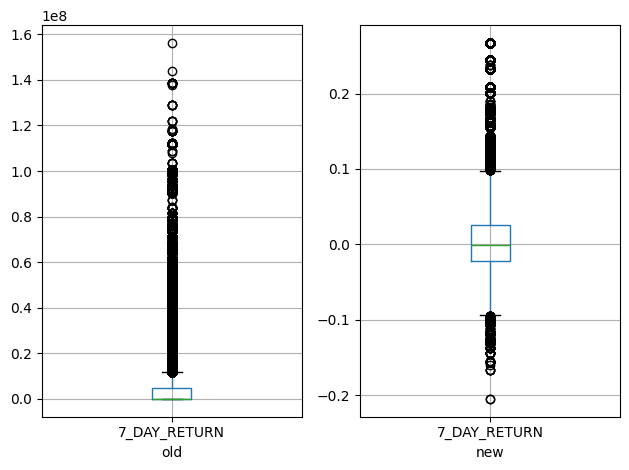

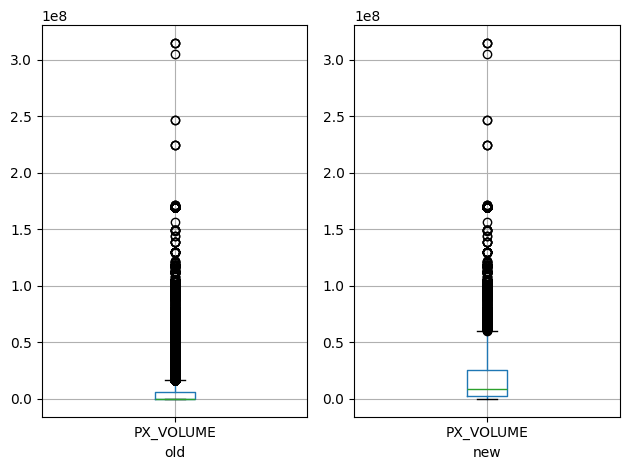

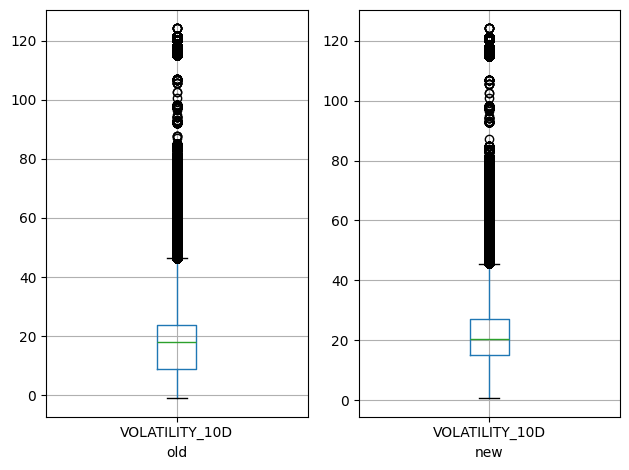

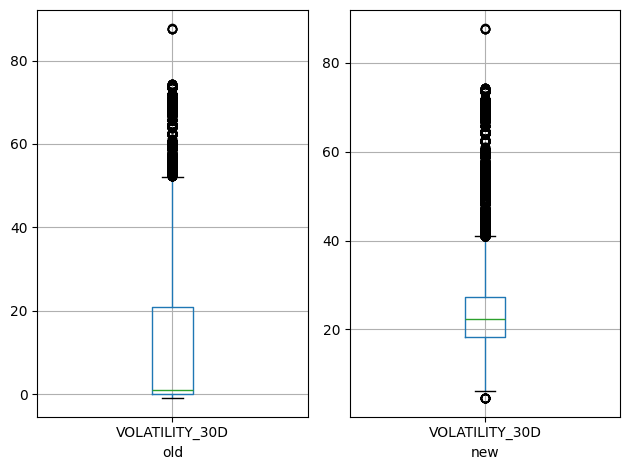

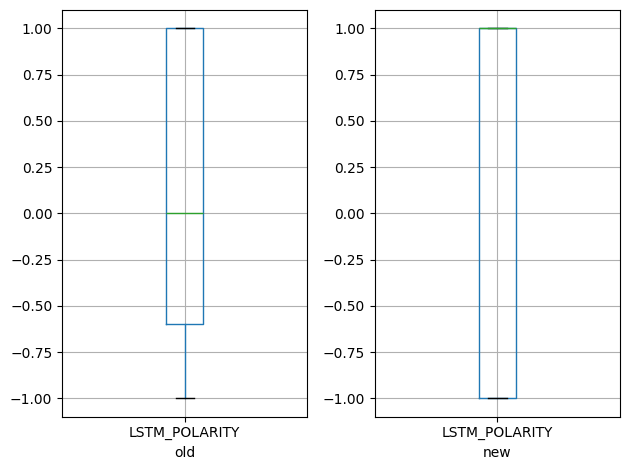

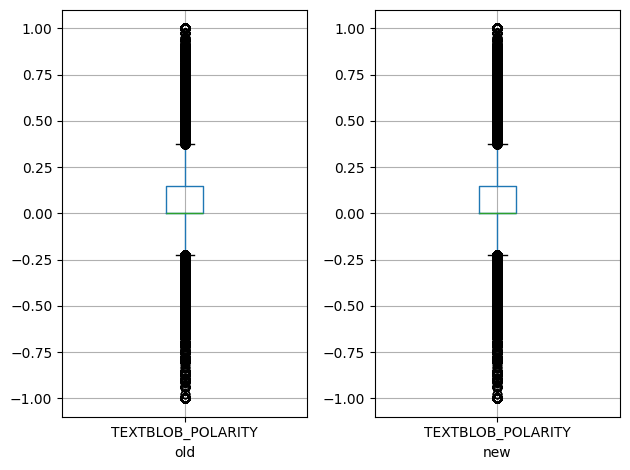

In [103]:
print('通过盒图对比新旧数据:')
for label in num_labels:
    plt.subplot(1, 2, 1)
    data.boxplot(label)
    plt.xlabel('old')
    plt.subplot(1, 2, 2)
    drop_data.boxplot(label)
    plt.xlabel('new')
    plt.tight_layout()
    plt.show()

In [104]:
print('显示剔除后是否还存在空值：')
drop_data.isna().sum()

显示剔除后是否还存在空值：


TWEET                0
STOCK                0
DATE                 0
LAST_PRICE           0
1_DAY_RETURN         0
2_DAY_RETURN         0
3_DAY_RETURN         0
7_DAY_RETURN         0
PX_VOLUME            0
VOLATILITY_10D       0
VOLATILITY_30D       0
LSTM_POLARITY        0
TEXTBLOB_POLARITY    0
dtype: int64

使用最高属性频率值来填充:
通过盒图对比新旧数据:
LAST_PRICE 属性的最高频率值为: 0.0


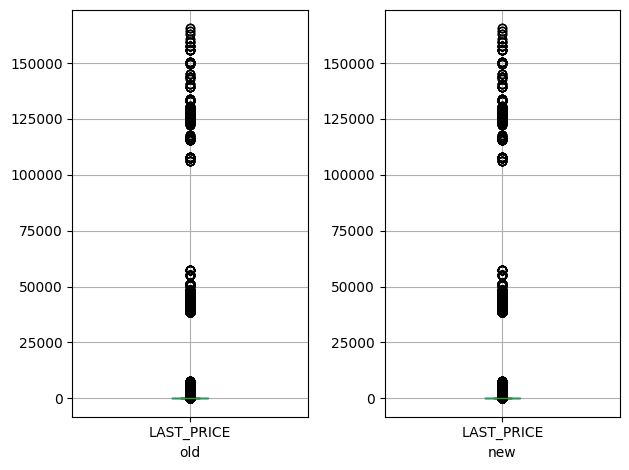

1_DAY_RETURN 属性的最高频率值为: 0.0


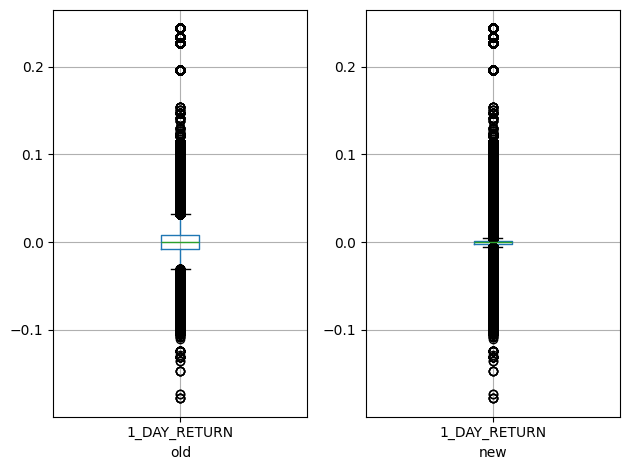

2_DAY_RETURN 属性的最高频率值为: 0.0


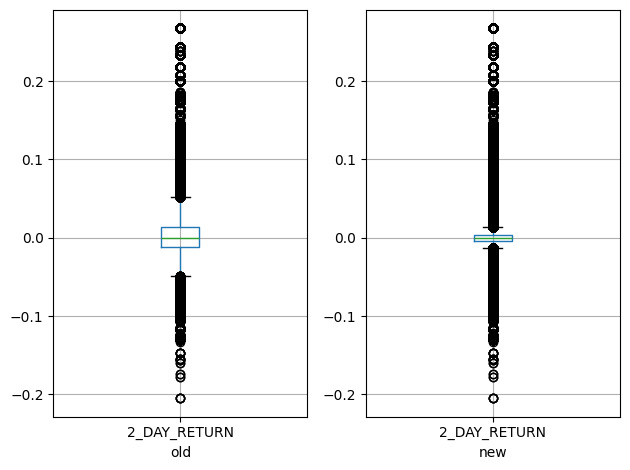

3_DAY_RETURN 属性的最高频率值为: 0.0390032502708558


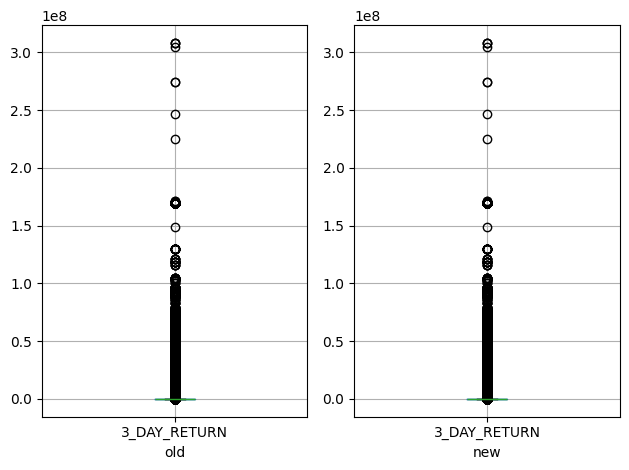

7_DAY_RETURN 属性的最高频率值为: 0.0648648648648648


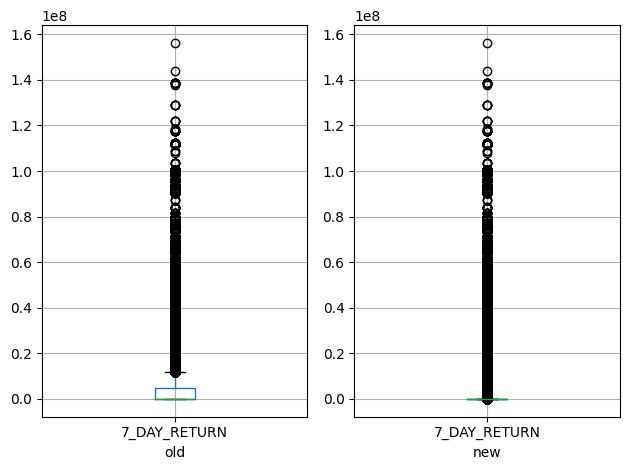

PX_VOLUME 属性的最高频率值为: 30987233.0


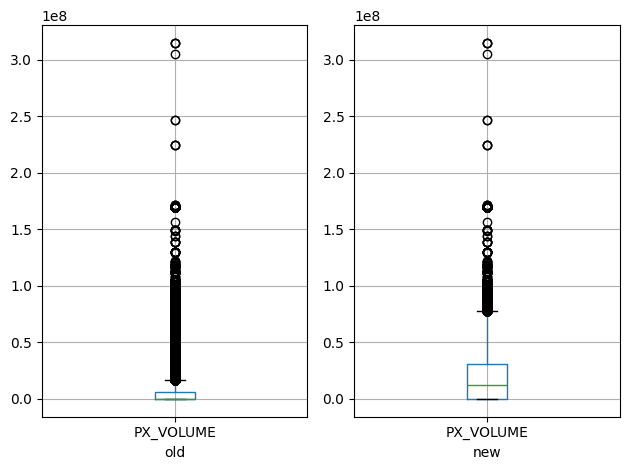

VOLATILITY_10D 属性的最高频率值为: 1.0


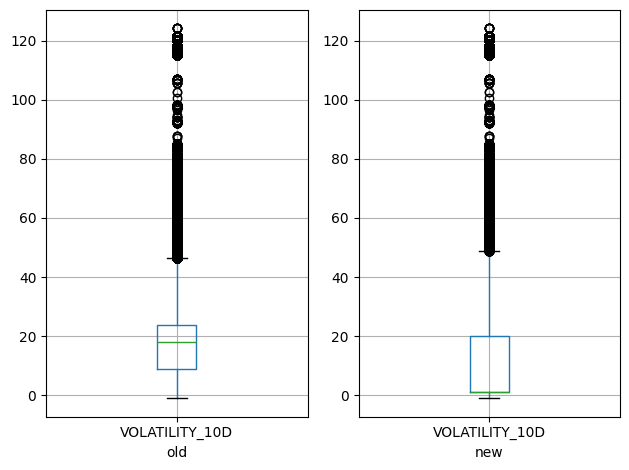

VOLATILITY_30D 属性的最高频率值为: 1.0


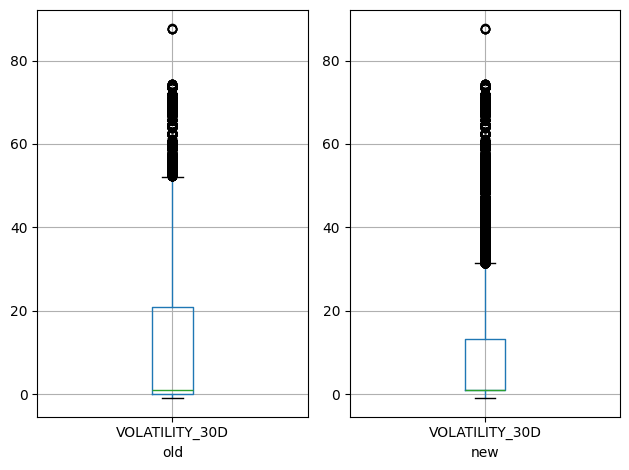

LSTM_POLARITY 属性的最高频率值为: 1.0


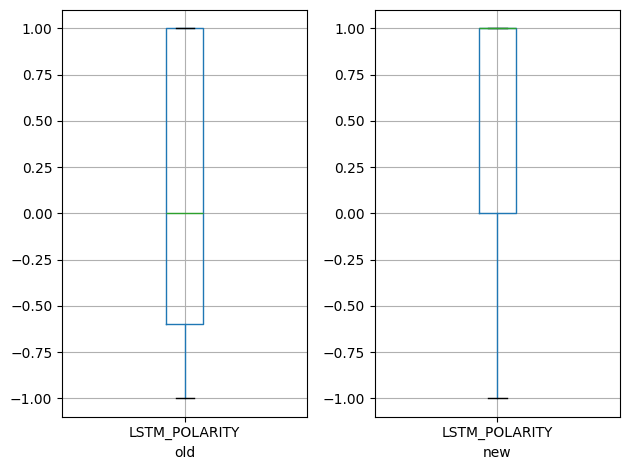

TEXTBLOB_POLARITY 属性的最高频率值为: 0.0


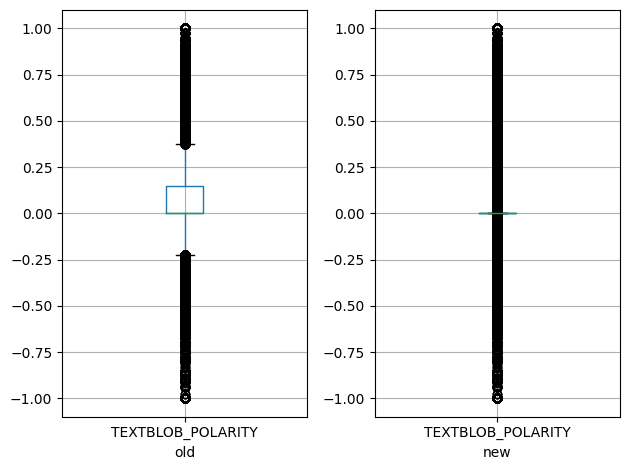

In [105]:
print('使用最高属性频率值来填充:')
print('通过盒图对比新旧数据:')
for label in num_labels:
    mode = data[label].mode()[0]
    new_data = data.fillna({label: mode})
    print(label, '属性的最高频率值为:', mode)

    plt.subplot(1, 2, 1)
    data.boxplot(label)
    plt.xlabel('old')
    plt.subplot(1, 2, 2)
    new_data.boxplot(label)
    plt.xlabel('new')
    plt.tight_layout()  # 调整整体空白
    plt.show()

In [106]:
print('通过属性的相关关系来填补缺失值')
print('相关关系矩阵:')
data[num_labels].corr()

通过属性的相关关系来填补缺失值
相关关系矩阵:


,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
LAST_PRICE,1.000000,-0.005238,-0.008347,-0.046854,-0.067607,-0.014275,0.058324,0.141961,-0.000554,0.015424
1_DAY_RETURN,-0.005238,1.000000,0.706888,0.179761,0.040449,0.073196,0.094400,0.008356,0.001068,-0.021811
2_DAY_RETURN,-0.008347,0.706888,1.000000,0.231127,0.022896,0.047402,0.053097,0.003715,-0.000391,-0.024355
3_DAY_RETURN,-0.046854,0.179761,0.231127,1.000000,-0.138282,-0.146286,-0.344914,-0.224640,-0.004550,-0.036525
7_DAY_RETURN,-0.067607,0.040449,0.022896,-0.138282,1.000000,-0.211080,0.140293,-0.322494,-0.024244,-0.021424
PX_VOLUME,-0.014275,0.073196,0.047402,-0.146286,-0.211080,1.000000,0.299877,0.528718,-0.004294,-0.031539
VOLATILITY_10D,0.058324,0.094400,0.053097,-0.344914,0.140293,0.299877,1.000000,0.532744,0.006113,-0.018018
VOLATILITY_30D,0.141961,0.008356,0.003715,-0.224640,-0.322494,0.528718,0.532744,1.000000,0.027542,-0.034899
LSTM_POLARITY,-0.000554,0.001068,-0.000391,-0.004550,-0.024244,-0.004294,0.006113,0.027542,1.000000,0.099696
TEXTBLOB_POLARITY,0.015424,-0.021811,-0.024355,-0.036525,-0.021424,-0.031539,-0.018018,-0.034899,0.099696,1.000000


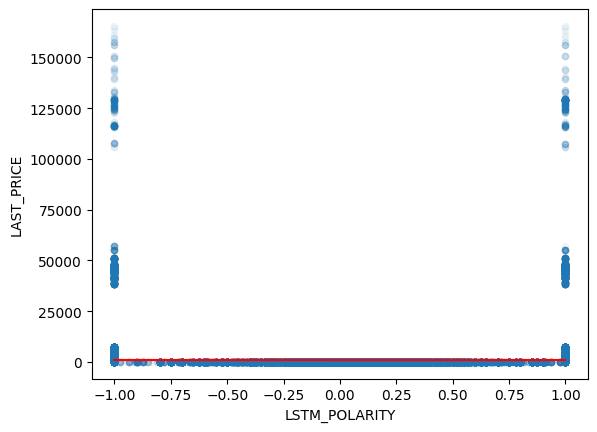

In [107]:
drop_data = data.dropna(subset=['LAST_PRICE', 'LSTM_POLARITY'])
x = drop_data['LSTM_POLARITY']
y = drop_data['LAST_PRICE']
x = np.array(x).reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
drop_data.plot(kind="scatter", x="LSTM_POLARITY", y="LAST_PRICE", alpha=0.05)
plt.plot(x, model.predict(x), 'r-')
# plt.ylim(0,300)
plt.show()

In [110]:
print('利用线性回归模型预测来填充属性缺失的值')
new_data = drop_data.copy()

for index, row in new_data[drop_data['LAST_PRICE'].isna()].head(5).iterrows():
    new_data['LSTM_POLARITY'][index] = model.predict(np.array(row['LAST_PRICE']).reshape(-1, 1))

利用线性回归模型预测来填充属性缺失的值


In [82]:
print('填充前的数据为:')
data[data['VOLATILITY_30D'].isna()].head(5)

填充前的数据为:


,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RT @loadsofvans: Retweet this post &amp; follo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,RT @Disney: See The Newest Trailer for #Beauty...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,RT @tarastrong: Just got @facebook back! I REA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,RT @DrJimmyStar: Check out Mens Encore by Fies...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
print('通过数据对象之间的相似性来填补缺失值')
full_data = drop_data[drop_data['3_DAY_RETURN'].notna()]
new_data = drop_data.copy()
consider_labels = ['1_DAY_RETURN', '2_DAY_RETURN']
for i, row in list(new_data[drop_data['3_DAY_RETURN'].isna()].head(5).iterrows()):
    for label in consider_labels:
        tmp_data = full_data[full_data[label]==row[label]]
        if len(tmp_data) > 0:
            new_data['3_DAY_RETURN'][i] = tmp_data['3_DAY_RETURN'].mean()
            break

print('填充后的数据:')
new_data[drop_data['2_DAY_RETURN'].isna()].head(5)

通过数据对象之间的相似性来填补缺失值
填充后的数据:


,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY


In [116]:
print('填充前的数据为:')
drop_data[drop_data['2_DAY_RETURN'].isna()].head(5)   

填充前的数据为:


,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
